<a href="https://colab.research.google.com/github/vithika-karan/churn-data-analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

**INTRODUCTION** </br>

A great man once said "***Given one hour to save the world, I would spend 55 minutes defining the problem and 5 minutes finding the solution***" and that great man was Albert Einstein.
Elaborating it further to the context of our field of data, I would like to say, in the world of data, the most critical task would be of understanding the data. The more time you spend on understanding it, the less time you would require to decode it and it will show you what it has been trying to say all along.</br>

So, let's just dive into it. Here we are given a cleaned churn dataset of a multinational telecommunications company. To understand the story behind this data, we should ask ourselves a few questions like;</br>


*   What is a telecommunications corporation? 
*   What does it do for income generation?
*   What is a churn dataset and what could be the primary reason for this data collection?
* And finally what outcomes can we expect out of the analysis of this dataset?


[Orange S.A.](https://en.wikipedia.org/wiki/Orange_S.A.) is a french multinational telecommunications corporation. A [telecommunications](https://www.investopedia.com/ask/answers/070815/what-telecommunications-sector.asp) sector consists of companies that transmit data in words, voice, audio, or video across the globe. Telecom equipment, telecom services, and wireless communication are the three basic sub-sectors of telecommunications.
Telecom has become increasingly focused on video, text, and data, as opposed to voice. Orange S.A. is majorly involved in operations such as networks, mobile financial services, cyber security, content and business services. A [Churn](https://en.wikipedia.org/wiki/Churn_rate) in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support. </br>
A churn analysis is done essentially to understand which clients were most likely to cancel a subscription or "leave the company" based on their usage of their services. 
Our job is to explore the dataset and understand the reasons behind leaving and come up with recommendations to ensure customer retention.


Sources</br>
https://www.orange.com/en/orange-group </br>



### Exploratory Data Analysis
[Exploratory data analysis](https://https://en.wikipedia.org/wiki/Exploratory_data_analysis) is a crucial part of data analysis. It involves exploring and analysing the dataset given to find out patterns,trends and conclusions to take better decisions related to the data, often using statistical graphics and other data visualization tools to summarise the results.
We will be using pandas to explore the data and matplotlib and seaborn to visualize it.

In [1]:
#Importing important libraries and modules for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Mounting google drive to further read the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/EDA PROJECT/Copy of Telecom Churn.csv")

### Understanding the data
First step involved in Exploratory Data Analysis is understanding the data and getting answers to some basic questions like; What is the data about?
How many rows or observations are there in it? How many features are there in it? What are the data types? Are there any missing values? And anything that could be relevant and useful to our investigation.

In [4]:
#First look of the dataset
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#Extracting the basic info, features, data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#### Observation:
This dataset contains of 3333 customers (i.e. rows) and 20 features (columns) about those customers. We can see that we have no missing values. That's great!



### Cleaning the data
The second step in Exploratory Data Analysis is to process and clean the data.
We observed that this dataset does not have any missing value which is not necessarily the case with real-life datasets. We have been given a cleaned dataset for the analysis as mentioned in the problem statement. Handling missing values is an important part of the EDA process. If there are very few missing values compared to the size of the dataset, we may choose to drop rows that have missing values. Otherwise, it is better to replace them with appropriate values. 


### Analysis of relationship between variables
The third step is to dive in the dataset, explore relationships between the features and comeup with conclusions and trend that serves our purpose. Our goal here is to explore the relationships of different variables with "Churn" to see what factors might be contributing to it and then give appropriate recommendations.

### Stayed vs Cancelled
Let's see how many people stayed and how many people decide to cancel their subscription with Orange SA.
We have to see what's the current churn rate and how can we reduce the number going further. <br/>
**Churn Rate** - It's the percentage of people who decide to cancel their subscription out of total customers over a time period.


False    2850
True      483
Name: Churn, dtype: int64


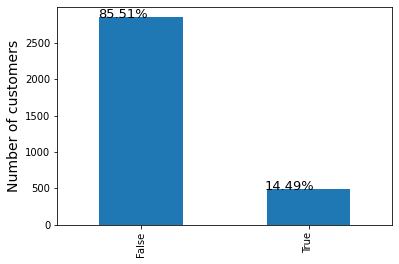

In [6]:
#Churn value_counts
churn_df = df["Churn"].value_counts()
print(churn_df)
#plotting
churn_plot = churn_df.plot(kind="bar")
churn_plot.set_ylabel("Number of customers", fontsize = 14)
#geting height of bar in percentage to determine the churn rate
totals = []
for i in churn_plot.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in churn_plot.patches:
    churn_plot.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13)

#### Observation:
We can see that we have a high number of customers who did not cancel their subscription which is pretty obvious but a churn rate of 14.49% is very high for a multinational telecom corporation and it can definitely be reduced. Let's find out the reasons behind this churn rate.

### Correlation Matrix
Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.
<br/>
By checking the correlation we are trying to find out the relationship of different variables with churn, so that we can figure out the factors affecting churn.
<br/>

First, we will take into account of the numeric variables of the dataset and drop out unnecessary variables to get a clear picture.

And then we will convert the values for International plan and Voice mail plan in accordance to the binary values for true and false.

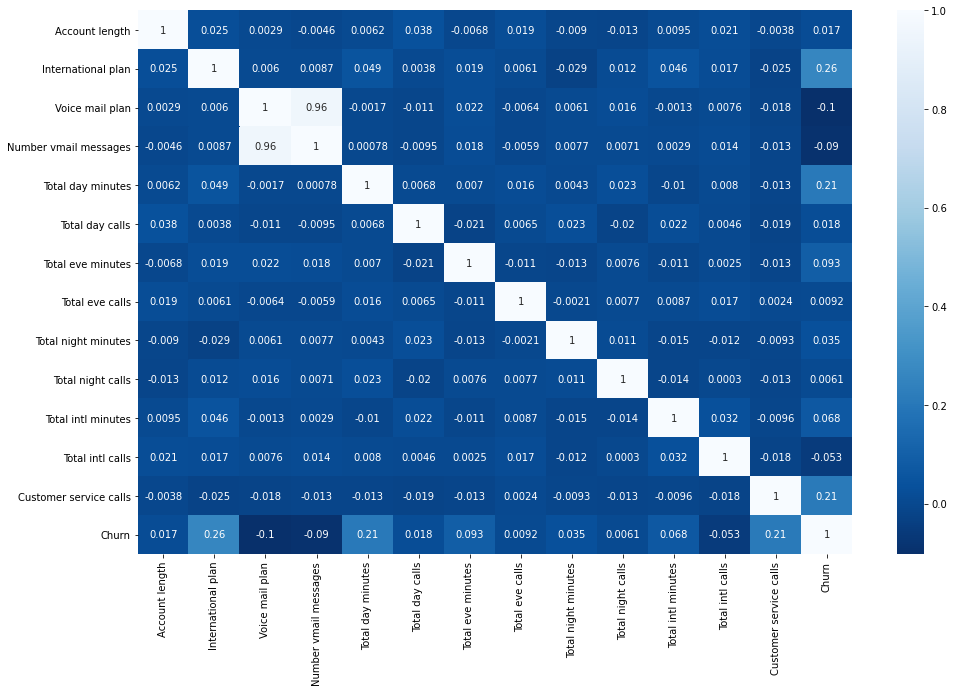

In [7]:
#we need only numeric columns here, let's drop the unnecessary
columns_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
corr_df = df.drop(columns = columns_to_drop, axis =1)
#we'll have to change strings for yes and no to 1 and 0 respectively to involve these columns in the matrix
corr_df['International plan'].replace({'No':0, 'Yes':1}, inplace=True)
corr_df['Voice mail plan'].replace({'No':0, 'Yes':1}, inplace=True)
#correlation matrix and heatmap
corr= corr_df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap='Blues_r', annot=True)

#### Observation:
*   The "International plan", "Total day minutes" and "Customer service calls" columns are positively correlated with "Churn".

*   The "Voice mail plan", "Number vmail messages" and "Total intl calls" columns are negatively correlated with "Churn".


### Relation between Churn and Categorical variables
We can see that there are three categorical columns, lets see how they present themselves against Churn and if we can derive some insights out of this.
#### International Plan:
Since International plan shows the most correlation with Churn, we will dig a little deeper on why this could be a reason behind the churn.

#### Voice mail plan:
Voice mail plan shows the highest negative correlation with Churn, we will also look into that in this section of categorical variables. 

#### State:
It's a categorical variable as well, we'll have to see whether there is high churn in a particular area or not.

### International Plan

No     3010
Yes     323
Name: International plan, dtype: int64


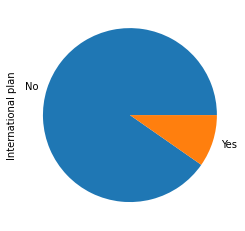

In [8]:
#International plan value count plot 
print(df["International plan"].value_counts())
df["International plan"].value_counts().plot(kind="pie")

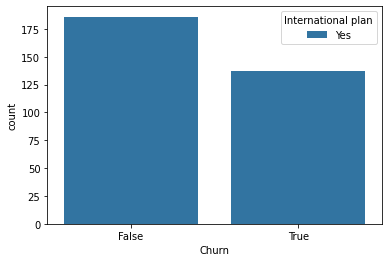

In [9]:
#Count plot of only those people that have international plan against churn
int_df = df[["International plan","Churn"]]
int_df_filterred = int_df[int_df["International plan"] == "Yes"].reset_index(drop=True) #by default it creates a column for previous index, drop=true to delete
#plotting
sns.countplot(x="Churn",data=int_df_filterred ,hue="International plan")

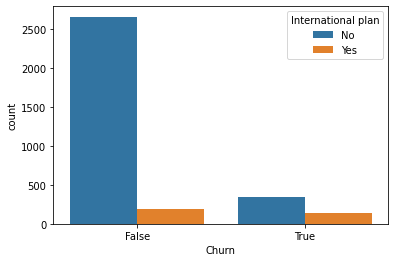

In [10]:
#International plan count plot against churn
sns.countplot(x="Churn",data=df,hue="International plan")

#### Observation:
We earlier saw that "International plan" had a positive correlation of 0.26, let's elaborate this fact further. <br/>
* We saw that only 9.69% (323 customers) out of the total 3333 customers has an international plan and out of these 323 people, significant number of people i.e. more than 175 people dropped out. Why did this happen? It could be because their plans might be expensive and yet service not upto the mark that they could retain their customers and justify those prices and they might have found better plans with better service outside of Orange SA. We'll see.
<br/>
* And obviously others not having an international plan did also drop out, could be because of other reasons, could be in search of affordable plans.

#### Voice Mail Plan

No     2411
Yes     922
Name: Voice mail plan, dtype: int64


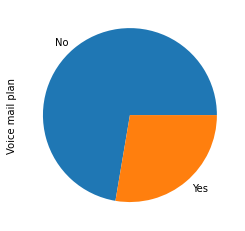

In [11]:
#Voice mail plan value count plot 
print(df["Voice mail plan"].value_counts())
df["Voice mail plan"].value_counts().plot(kind="pie") #27.66% 

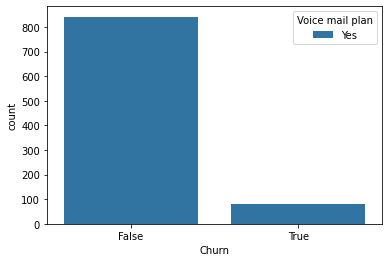

In [12]:
#Count plot of only those people that have Voice mail plan against churn
vmailp_df = df[["Voice mail plan","Churn"]]
vmailp_filterred = vmailp_df[vmailp_df["Voice mail plan"] == "Yes"].reset_index(drop=True) 
#plotting
sns.countplot(x="Churn",data=vmailp_filterred ,hue="Voice mail plan")

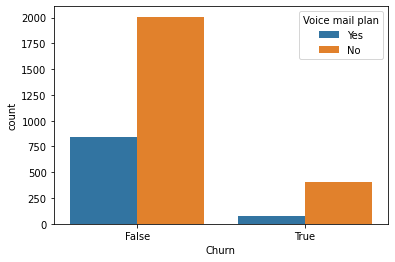

In [13]:
#Voice mail plan count plot against churn
sns.countplot(x="Churn",data=df,hue="Voice mail plan")

#### Observation:
We earlier saw that "Voice mail plan" had a negative correlation of 0.1, let's elaborate this fact further.

* We saw that only 27.66% (922 customers) out of the total 3333 customers has a voice mail plan and out of these 922 people, less than 100 people dropped out.  This suggests that they have good service when it comes to voice mail. This also suggests the plan might be expensive otherwise more poeple would have had this plan.
* And others not having a voice mail plan seems to drop out more. They could be dropping out in search of better voice mails plans in their budget, which lead to changing the telecom service altogether.
* They could create more ad campaigns and figure out a way to reach out other customers to reduce their churn rate.


### States



In [32]:
#Grouping State against Churn, using sum() to count the number of true booleans in churn column
state_df = df.groupby("State")["Churn"].sum().reset_index()
state_df.sort_values("Churn", ascending= False, inplace = True) # sorting true churn values into descending order to get states wih high churn
state_df.head()

,State,Churn
31,NJ,18
43,TX,18
20,MD,17
22,MI,16
23,MN,15


In [34]:
#average churn across states
state_df.describe()

,Churn
count,51.000000
mean,9.470588
std,4.001764
min,3.000000
25%,6.500000
50%,9.000000
75%,12.500000
max,18.000000


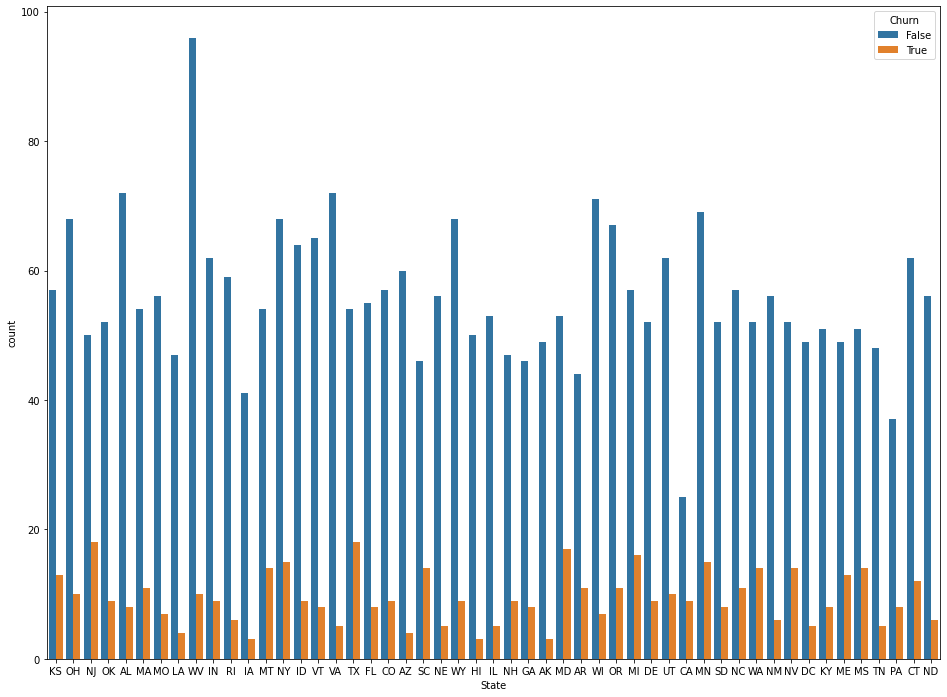

In [33]:
#Plotting 
plt.figure(figsize=(16,12))
sns.countplot(x = "State", data = df, hue = "Churn")

#### Observation:
* Some states have more churn rate than usual. The average churn is 9. The states of New Jersey, Texas and Maryland are to name a few.
* A network checkup, maintenance and upgradation would be strongly suggested in these areas.



### Relation between Churn and Numeric variables

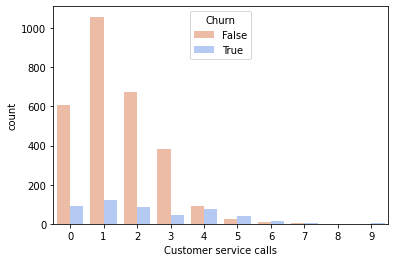

In [ ]:
#Customer service calls were low
sns.countplot(x="Customer service calls",data=df,hue="Churn",palette="coolwarm_r")


Notes <br/>
From a company point of view, it is necessary to gain this information because acquiring new customers is often arduous and costlier than retaining old ones. Hence, the insights gained from Churn Prediction helps them to focus more on the customers that are at a high risk of leaving.

<br/>
Why does Churn occur?
Many factors influence the reasons for a customer to Churn. It may be the fact that there’s a new competitor in the market offering better prices or maybe the service they are getting has not been up to the mark, so on and so forth.

Hence, there is no correct answer as to why exactly the customer wants to churn because as you can see there are many influencing factors.


Future </br>
https://www.orange-business.com/en/press/orange-presents-its-new-strategic-plan-engage2025 </br>
https://www.orange.com/en/engagements/la-marque/la-marque-orange/orange-story-commitment-spans-ages
</br>

https://www.investopedia.com/ask/answers/070815/what-telecommunications-sector.asp </br>

https://www.comarch.com/telecommunications/blog/how-telcos-are-discovering-new-revenue-streams-with-network-slicing-for-5g/




